<a href="https://colab.research.google.com/github/Amith07220/Sentimental-Analysis/blob/main/Assignment_5_c0937030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 1: Loading the Dataset and Preprocessing**

In [5]:
# Step 1: Unzip uploaded folder
import zipfile
import os

zip_path = '/content/archive (2) (1).zip'
extract_dir = '/content/data_folder'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Find CSV file in extracted folder
import pandas as pd

for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith('.csv'):
            dataset_path = os.path.join(root, file)
            break

# Step 3: Load dataset
df = pd.read_csv(dataset_path)
print("Dataset Loaded Successfully!\n")

# Step 4: Show basic info
print(df.info())
print("\nSample data:\n", df.head())

# Step 5: One-Hot Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nPreprocessed Data (One-Hot Encoded):")
print(df_encoded.head())


Dataset Loaded Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Sample data:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female     

# **TASK 2: Visualizing Distrubutions and Correlation:**

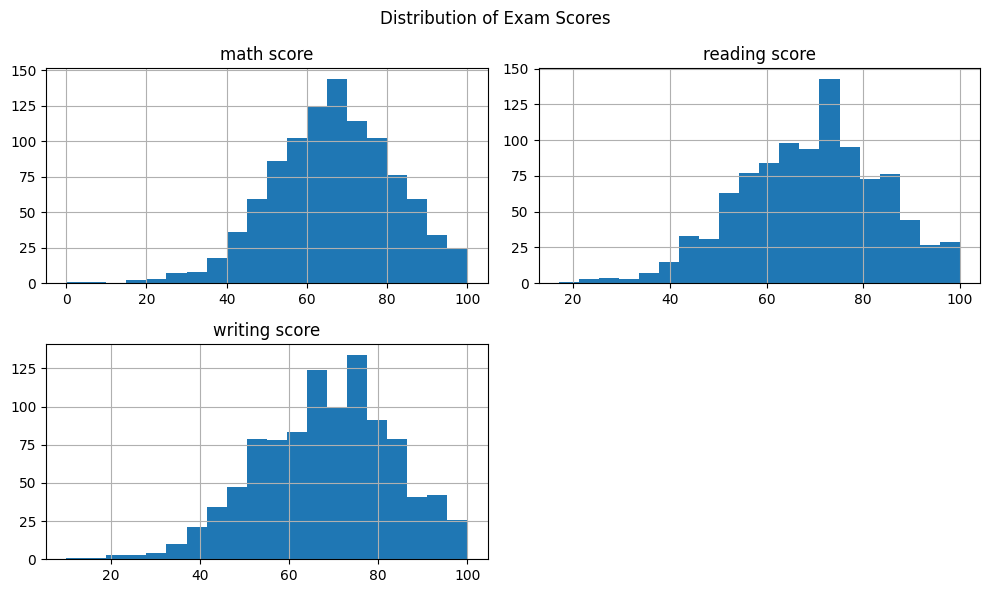

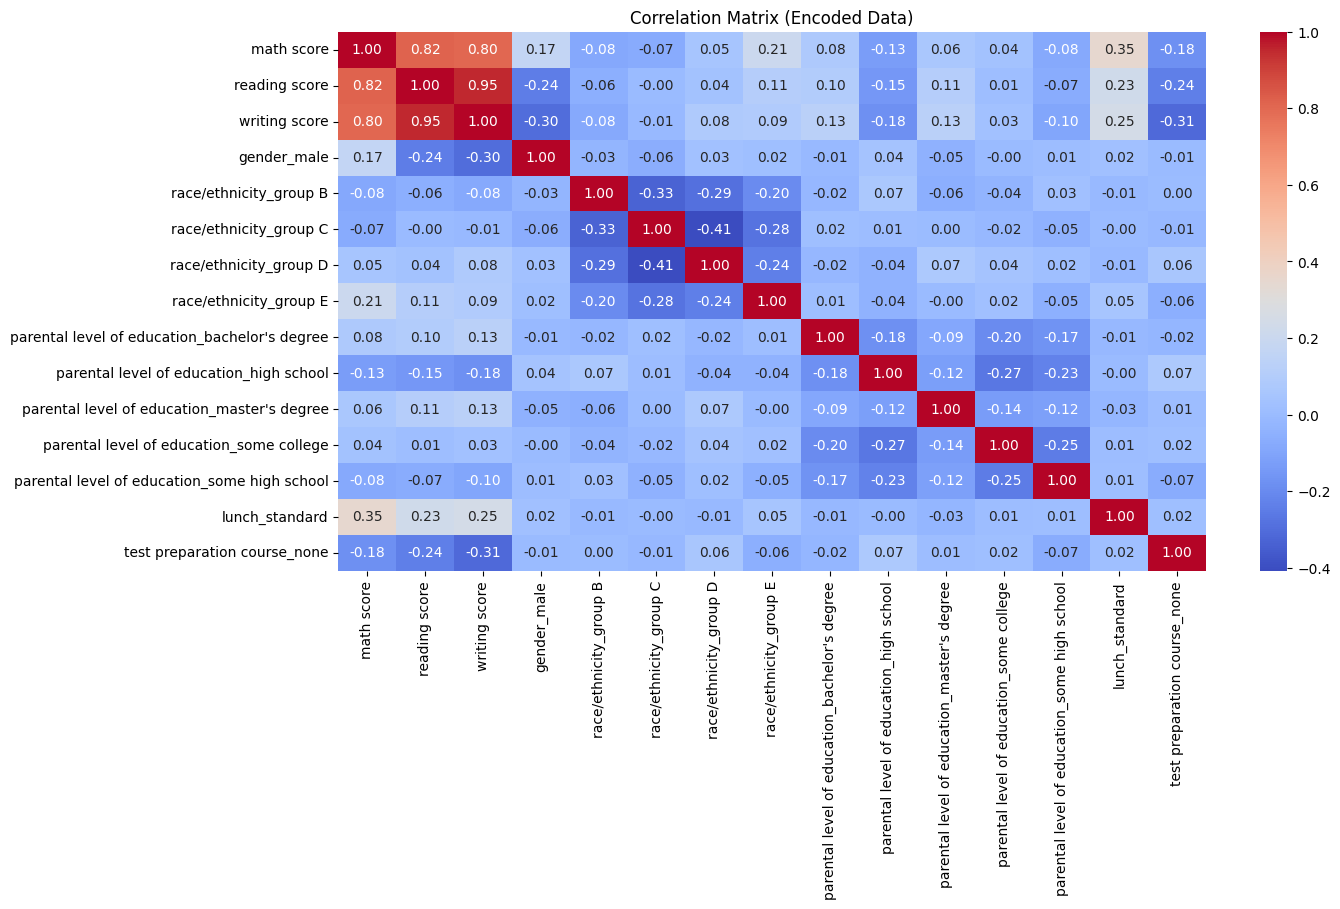

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of scores
df[['math score', 'reading score', 'writing score']].hist(bins=20, figsize=(10,6))
plt.suptitle("Distribution of Exam Scores")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Encoded Data)")
plt.show()


# **TASK 3: Building MLR Score and Predicting Math Score:**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Model Intercept:", model.intercept_)
print("\nModel Coefficients:")
coef_df = pd.Series(model.coef_, index=X.columns)
print(coef_df.sort_values(ascending=False))


Model Intercept: -10.912497209409949

Model Coefficients:
gender_male                                      13.064884
race/ethnicity_group E                            4.892649
lunch_standard                                    3.510075
test preparation course_none                      3.289642
parental level of education_some college          0.998856
parental level of education_high school           0.929312
parental level of education_some high school      0.756470
writing score                                     0.724148
race/ethnicity_group B                            0.359323
reading score                                     0.236023
race/ethnicity_group D                           -0.613236
race/ethnicity_group C                           -0.625617
parental level of education_bachelor's degree    -0.716901
parental level of education_master's degree      -1.400489
dtype: float64


# **TASK 4: Analyzing the effect of test preparation and Parental Education**

In [8]:
# Filter relevant features
prep_edu_features = [col for col in df_encoded.columns if 'test preparation course' in col or 'parental level of education' in col]

# Subset data
X_sub = df_encoded[prep_edu_features]
y = df_encoded['math score']

# Split and train
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y, test_size=0.2, random_state=42)
model_sub = LinearRegression()
model_sub.fit(X_train_sub, y_train_sub)

# Print effect analysis
print("Effect of Test Preparation Course and Parental Education Level on Math Score:\n")
effect = pd.Series(model_sub.coef_, index=prep_edu_features)
print(effect.sort_values(ascending=False))


Effect of Test Preparation Course and Parental Education Level on Math Score:

parental level of education_bachelor's degree    2.654661
parental level of education_master's degree      0.282902
parental level of education_some college         0.046097
parental level of education_some high school    -3.501110
parental level of education_high school         -4.470769
test preparation course_none                    -5.919340
dtype: float64


# **TASK 5: Evaluating Model Performance using R2, MAE, RMSE**

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict using test data from Task 3
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation Metrics:\n")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:

R² Score: 0.8804
Mean Absolute Error (MAE): 4.21
Root Mean Squared Error (RMSE): 5.39
